
نام پروژه: Naïve bayes classifier


هدف پروژه: استفاده از Naïve bayes classifier به منظور تجزیه و تحلیل کامنت ها و تشخیص مثبت و منفی بودن دیدگاه کاربران
توضیح کلی پروژه : در این پروژه می خواهیم با استفاده از Naïve bayes classifier به تجزیه و تحلیل کامنت هایی که در فایل comment_test.csv آمده اند بپردازیم و مثبت یا منفی بودن آن ها و یا در واقع recommended  یا  not_recommended  بودن آن ها را مشخص کنیم. به این منظور می بایست در ابتدا با استفاده از اطلاعات فایل comment_train.csv مدل خود را train کنیم و سپس روی داده های فایل test مدل را اجرا کرده و تشخیص لازم را انجام دهیم.


توضیح روند پروژه:


فاز اول: پیش پردازش داده ها:

همان طور که گفته شد در این پروژه فایلی با نام comment_train.csv در اختیار داریم که حاوی نظرات کاربران دیجی کالا می باشد . این فایل حاوی سه ستون title , comment,recommend می باشد که می خواهیم در ابتدا این داده ها را تحلیل کنیم و با توجه به تجزیه و تحلیلی که روی داده ها انجام دادی و با بهره گیری از Naïve bayes classifier مدلی به دست آوریم که از آن مدل در تشخیص recommend بودن یا not_recommend بودن هر یک از سطر های فایل test استفاده کنیم.
به این منظور در ابتدا برای آن که روی داده هایمان بتوانیم بهتر و دقیق تر تجزیه و تحلیل کنیم لازم است که آن ها را پیش پردازش کنیم.(هم داده های فایل test و هم داده های فایل train) برای این کار از کتابخانه هضم استفاده می کنیم که کتابخانه ای است که برای عملیات پیش پردازش روی متون فارسی مورد استفاده قرار می گیرد.  با استفاده از normalizer.normalize() می توانیم فاصله ها را تبدیل به نیم فاصله کنیم و برخی موارد را اصلاح کنیم. سپس از خروجی تابع بالا که متنی normalize شده است را به عنوان وردی تابع word_tokenize استفاده می کنیم. این تابع همان طور که از اسمش مشخص است متن را تبدیل به لیستی از توکن ها می کند و این برای تجزیه و تحلیل داده ها بسیار مهم است. در میان این توکن ها ، توکن هایی وجود دارد که بسیار تکرار می شوند و درنتیجه ی تجزیه و تحلیل ما اثری ندارند مانند کلماتی مثل : از، به، در،که و ... این کلمات همان stop words ها می باشند که باید آن ها را حذف کنیم. برای این کار می توان لیستی از stop word ها را در اینترنت پیدا کرد و آن ها را از متن مورد نظر حذف کرد ولی من در اینجا صرفا همه ی توکن هایی که دارای طول کوچک تر یا مساوی دو می باشند غیر از دو کلمه ی "کم" و "بد" را حذف کردم که این کار خود به خود منجر به حذف علائم نگارشی نیز می شود.
پس از حذف stop words ها حالا تمام کلمه های باقی مانده را به کمک تابع stemmer()  ریشه یابی می کنیم.
در این بخش از پروژه روی داده های فایل iterate می کنیم و به ازای هر سطر  روی بخش title , comment تمامی مراحل گفته شده را اجرا می کنیم و توکن های نهایی هر سطر را در برای فایل train ، در لیستی به نام train_tokenlist ریخته  و لیست را به دیکشنری مورد نظریعنی همان train_tokendict  اضافه می کنیم . این دیکشنری در انتهای بررسی تمامی سطر های فایل train شامل لیست هایی است که هر لیست حاوی توکن های متناظر با یک سطر است پس در آن مجموعه ای از توکن های فایل train  در بخش های title و comment را داریم. برای داده های فایل test هم همین روند را تکرار می کنیم با این تفاوت که توکن های هر سطر را ابتدا در لیستی به نام test_tokenlist می ریزیم.
همان طور که پیش تر اشاراتی شد برای ریشه یابی یک کلمه می توان از دو متد stemming , lemmatization استفاده کرد. در تابع stemmer کلمه ای که به آن داده می شود تنها ریشه یابی می شود بدون آن که به کلمات اطراف آن توجهی شود اما در lemmatization کلمه ی مورد نظر با توجه به دامنه لغاتی که در آن حضور دارد و نقش اش و کلمات اطراف آن ریشه یابی می شود که دقیق تر است. اما باعث می شود زمان بیش تری برای ریشه یابی کلمات نیاز داشته باشیم و کمی کند تر است.
مثالی از تفاوت این دو تابع این است که اگر به تابع stemmer کلمه ی "عالی ترین" را بدهیم خروجی آن "عالی" خواهد بود اما اگر به تابع lemmatizer این عبارت را بدهیم، خودش را بر می گرداند. 
در نتیجه به وسیله ی این دو می توانیم کلماتی که دارای یک ریشه مشخص هستند را به عنوان همان ریشه تلقی کنیم و تعداد آن ها را دقیق تر داشته باشیم.

فاز دوم: فرآیند مسئله

همان طور که گفته شد برای تشخیص recommended یا not_recommended بودن می خواهیم از naïve bayes و از روش bag of words استفاده کنیم. در این روش به هر کلمه مستقل از جایگاهش نگاه می کنیم و feature  های مسئله را تعداد هر کلمه در کلاس مربوطه را در نظر می گیریم یعنی هرچه تعدا یک کلمه در یک کلاس بیش تر باشد با احتمال بیش تری به آن کلاس تعلق دارد. به این منظور از naïve bayes استفاده می کنیم  که فرمول آن طبق شکل در صورت پروژه موجود است. 
 از آنجایی که می خواهیم احتمال recommend بودن یا not_recommended بودن را با داشتن متن(مجموعه ای از کلمات) و تیتر کامنت حدس بزنیم پس posterior probability ما به  این صورت خواهد بود. همان طور که در فرمول داریم می توانیم با محاسبه likelihood این محاسبات را انجام دهیم. که در این جا likelihood برای مسئله ما احتمال متن(تک تک کلمه های متن) به شرط recommended بودن یا not_recommended بودن می باشد و class prior probability  احتمال recommended و not_recommended می باشد و predictor prior probability  همان احتمال متن(مجموعه ای از کلمات می باشد) .
همان طور که گفته شد likelihood برای مسئله ما احتمال متن(تک تک کلمه های متن) به شرط recommended بودن یا not_recommended بودن می باشد و از آن جایی که متن ما مجموعه ای از کلمات است برای محاسبه ای این احتمال باید احتمال تک تک کلمات متن را به ازای recommended بودن و not_recommended بودن را محاسبه کنیم و با ضرب کردن احتمال تک تک کلمه ها در این دو حالت ، حالتی را انتخاب می کنیم که احتمال بیش تری دارد(recommended بودن و not_recommended بودن). 
برای انجام محاسبات این مرحله از همان train_tokendict ای که ساخته ایم استفاده می کنیم.از آن جایی که در این دیکشنری برای هر سطر از فایل توکن های مربوط به تیتر و کامنت را (به صورت تلفیقی) و  recommended بودن و not_recommended بودن   را داریم پس به ازای هر کلمه داخل این دیکشنری اگر در کامنتی بود که recommended بود آن را به لیستی به نام all_recommended_words اضافه می کنیم و counter ای به نام recommend_counter را یک واحد زیاد می کنیم که این counter نشان دهنده ی تعداد کل کلمات موجود در recommended می باشد. هم چنین اگر این کلمه در کامنتی بود که not_recoomended بود آن را به لیستی به نام all_notrecommended_words  اضافه می کنیم و مقدار not_recommend_counter را یک واحد افزایش می دهیم.  در این مرحلهp_r  وp_n_r را که نشان دهنده احتمال recommended بودن یا نبودن را نمایش می دهند قابل محاسبه است.(همان class prior probability)
با استفاده از CountFrequency روی هر دو لیست all_notrecommended_words و all_recommended_word می توانیم دیکشنری ای داشته باشیم که key های آن کلمات داخل آن لیست می باشد و value هر کدام ، میزان تکرار آن ها در لیست می باشد. و حالا با تقسیم کردن هریک از value  ها به تعداد کل کلمات موجود در هریک از این دیکشنری ها می توانیم احتمال تک تک کلمات به ازای recommended بودن یا نبودن را محاسبه کنیم. و آن ها را در دیکشنری های جدیدی با نام های p_recommended_word و p_not_recommended_wored ذخیره می کنیم.
حال با ایجاد دیتافریم جدیدی که محتوای آن همان دیتا فریم قبلی (محتوای فایل test)است  به همراه یک ستون اضافه تر(‘predict’)  می خواهیم recommended  بودن یا نبودن هر یک از کامنت ها را در ستون predict پیش بینی کنیم. 
به ازای هر توکن ای که داخل کامنت یک سطر از فایل test قرار دارد آن توکن را در هر دو دیکشنری پیدا می کنیم و مقدار احتمال آن را در p_recommend و یا در p_not_recommend  که به ترتیب در ابتدا به p_r و p_n_r ست شده است.
در آخر (بعد از بررسی آخرین توکن یک کامنت) دو مقدار p_recommend و p_not_recommend را باهم مقایسه کرده و بر اساس آن مقدار ستون predict را حدس می زنیم.


بخش Additive Smoothing  :

همان طور که در توضیحات پروژه آمده است ممکن است کلمه ای در recommended ها نیامده باشد و در not_recommended وجود داشته باشد و مدل ما در این حالت حدس میزند که پیش بینی ما باید not_recommended باشد که این درست نیست. چرا ؟ زیرا که اگر کلمه ای در recommended ها نیامده باشد پس احتمال آن کلمه به شرط recommended بودن که برابر است با تعداد دفعاتی که آن کلمه در recommended آمده تقسیم بر تعداد همه ی کلمات موجود در recommended ، برابر 0 خواهد شد و از آن جایی که احتمال های کلمات مختلف به شرط recommended بودن در هم ضرب می شود پس کل این احتمال برابر 0 می شود که قطعا از احتمال not recommended کم تر می شود پس مدل ما در اینگونه موارد همواره حدس میزند که به کلاس not recommended تعلق دارد. برای حل این مشکل از روش additive smoothing  استفاده می کنیم که در آن مثلا احتمال هر کلمه به شرط recommended بودن به جای این که با تقسیم تعداد دفعاتی که آن کلمه در recommended  ها آمده بر تعداد کل کلمات موجود در recommended ها از ضریب آلفایی استفاده می کنیم که با صورت جمع می شود و در مخرج در تعداد انواع کلمات موجود در recommende (به طور مثال) ضرب شه و با تعداد همه کلمات موجود در recommended جمع می شود.
استفاده از این نوع احتمال باعث می شود اگر کلمه در یکی از recommended ها یا  not recommended   ها باشد و در دیگری نباشد یا در هر دو نباشد و کلمه ای جدید باشد برای آن احتمالی غیر از صفر در نظر گرفته شود و تشخیص ما دقیق تر شود. 


فاز سوم: ارزیابی

برای آن که بتوانیم میزان تاثیر هر یک از عملیاتی که روی داده های فایل هایمان انجام می دهیم را بیابیم طبق تعریف های داده شده 4 پارامتر گفته شده را محاسبه می کنیم. هم چنین هر یک از این 4 پارامتر را برای 4 حالت انجام یا عدم انجام preproccessing و additive smoothing حساب می کنیم.
برای محاسبه ی precision باید تعداد سطر هایی که recommended بودند و ما هم آن ها را recommended تشخیص داده ایم را بر تعداد سطر هایی که recommended تشخیص داده شده اند(چه درست و چه غلط) تقسیم کنیم و این باعث می شود که مقداری که به دست می آوریم از مقدار واقعی کم تر باشد.
برای محاسبه ی recall  باید تعداد کامنت هایی را که به درستی recommended تشخیص داده شده اند را بر تعداد کامنت هایی که در مجموعه داده test recommended  بوده اند تقسیم کنیم که این باعث می شود مقدار به دست آمده خیلی خوشبینانه باشد و از مقدار واقعی بیش تر باشد.
برای محاسبه ی F1  از میانگینی استفاده می شود که میانگین همساز (Harmonic Mean) است که به میانگین توافقی نیز معروف است. زمانی که مقادیر از نوع نرخ یا نسبت باشند، از این نوع میانگین برای محاسبه متوسط داده ها استفاده میشود. که در آن تعداد نرخ هایی را که داریم بر مجموع معکوس نرخ ها تقسیم می شود. و میانگین همساز همیشه از میانگین حسابی کمتر است و زمانی که نرخ برایمان اهمیت دارد و داده هایمان غیر صفر است    کاربرد دارد.
طبق خروجی نمایش داده شده می توان مقدار 4 پارامتر خواسته شده برای 4 حالت مختلف گفته شده را مشاهده کرد.

5 کامنتی که در مدل ما به اشتباه تشخیص داده شده اند در خروجی آمده است. 
یکی از مشکلاتی که ممکن است باعث شده باشد که اشتباه تشخیص داده باشیم این است که در صورت مساوی بودن احتمال ها در حالت recommend  و not recommended  در نظر گرفته ایم که آن کامنت را متعلق به کلاس recommended بداند در صورتی که ممکن است واقعا به کلاس not recommended  تعلق داشته باشد.هم چنین ممکن است کاربری نظر خود را به صورت دوپهلو و کنایه ای نوشته باشد و مثلا در آن از جملاتی مثل وااااقعن عالی بود...استفاده کند ولی not recommended باشد چون نظرش را به صورت کنایه آمیز مطرح کرده است و ما با وجود کلماتی مثل عالی آن را recommended حدس زده باشیم.

تحلیل نمودار ها: همان طور که از نمودار ها پیداست هنگامی که precision , accuracy , f1 را محاسبه می کنیم به ترتیب مدل 1 بهتر از 2 بهتر از 3 بهتر از 4 می باشد و این بدان معناست که روی محاسبه ی اینگونه احتمال ها روش های پیش پردازش و additive smoothing تاثیر دارد اما در محاسبه ی recall  این را نمی بینیم و در دوحالتی که additive smoothing نداریم این مقدار بیش تر است. 
همچنین در هر مدل می توان دید که مقدار accuracy و f1 خیلی به هم نزدیک اند ولی مقدار recall و  precision  با آن ها فاصله دارد و مقدار  precision از recall کم تر می باشد.

preproccessing_and_aditive_smoothing : Accuracy: 0.925
preproccessing_and_aditive_smoothing : precision: 0.9066985645933014
preproccessing_and_aditive_smoothing : recall: 0.9475
preproccessing_and_aditive_smoothing : f1: 0.9266503667481663


without_preproccesing_and_with_additive_smoothing : Accuracy: 0.91125
without_preproccesing_and_with_additive_smoothing : precision: 0.8870588235294118
without_preproccesing_and_with_additive_smoothing : recall: 0.9425
without_preproccesing_and_with_additive_smoothing : f1: 0.913939393939394


with_preproccessing_and_without_additive_smoothing : Accuracy: 0.87625
with_preproccessing_and_without_additive_smoothing : precision: 0.8115942028985508
with_preproccessing_and_without_additive_smoothing : recall: 0.98
with_preproccessing_and_without_additive_smoothing : f1: 0.8878822197055493


without_preproccessing_and_additive_smoothing : Accuracy: 0.85625
without_preproccessing_and_additive_smoothing : precision: 0.7844311377245509
without_preproccessin

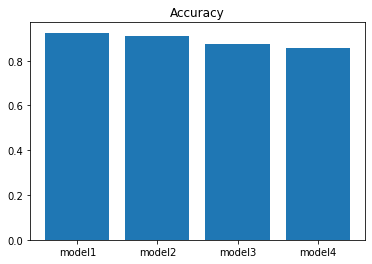

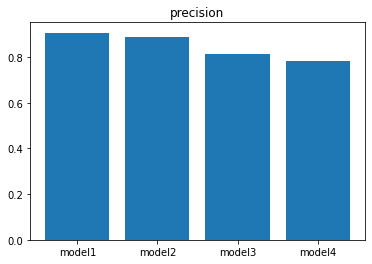

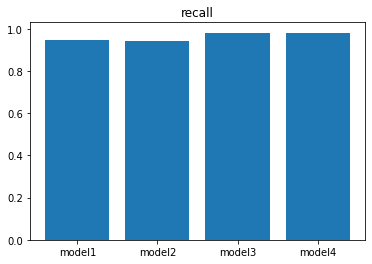

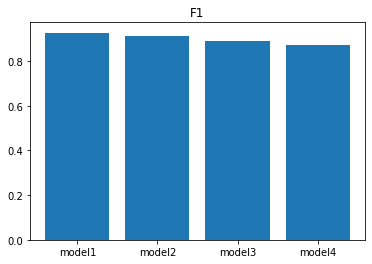

In [1]:
from __future__ import unicode_literals
from hazm import *
from matplotlib import pyplot as plt
import pandas as pd 

def delet_stop_words(mylist):
    for i in mylist:
        if(len(i)<=2):
            if(i=="بد" or i=="کم"):
                continue
            else:
                mylist.remove(i)
    return mylist

def CountFrequency(my_list):
    count = {} 
    for i in my_list: 
        count[i] = count.get(i, 0) + 1
    return count

def preproccessing_and_aditive_smoothing():
    data1 = pd.read_csv('comment_train.csv')   
    normalizer = Normalizer()
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()
    train_tokendict={}
    test_tokendict={}
    k=0
    for row, column in data1.iterrows():
        train_tokenlist=[]
        n=normalizer.normalize(column[0])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            train_tokenlist.append(s)
        n=normalizer.normalize(column[1])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            train_tokenlist.append(s)
        train_tokenlist.append(column[2])
        train_tokendict[k]=train_tokenlist   
        k=k+1
    recommend_counter=0
    not_recommend_counter=0
    all_recommended_words=[]
    all_notrecommended_words=[]
    for i in range(0,len(train_tokendict)):
        l=len(train_tokendict[i])
        if(train_tokendict[i][l-1]=="recommended"):
            recommend_counter=recommend_counter+1
            all_recommended_words.extend(train_tokendict[i][:-1])
        if(train_tokendict[i][l-1]=="not_recommended"):
            not_recommend_counter=not_recommend_counter+1
            all_notrecommended_words.extend(train_tokendict[i][:-1])
    sum1=recommend_counter+not_recommend_counter
    p_r=recommend_counter/sum1
    p_n_r=not_recommend_counter/sum1
    c1=CountFrequency(all_recommended_words)
    c2=CountFrequency(all_notrecommended_words)
    total1 = sum(iter(c1.values()), 0.0)
    total2=sum(iter(c2.values()), 0.0)
    p_recommended_word={k: v / total1 for k, v in iter(c1.items())}
    p_not_recommended_wored={k: v / total2 for k, v in iter(c2.items())}
    a=0.001
    AS_p_recommended_word={k: (v+a) / (total1+a*len(c1.keys())) for k, v in iter(c1.items())}
    AS_p_not_recommended_wored={k: (v+a) / (total2+a*len(c2.keys())) for k, v in iter(c2.items())}
    data2 = pd.read_csv('comment_test.csv')
    df2 = pd.DataFrame(data2, columns= ['title','comment','recommend','predict'])
    k=0
    predict_list=[]
    for row, column in df2.iterrows():
        test_tokenlist=[]
        n=normalizer.normalize(column[0])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            test_tokenlist.append(s)
        n=normalizer.normalize(column[1])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            test_tokenlist.append(s)
        p_recommend=p_r
        p_not_recommend=p_n_r
        for i in test_tokenlist:
            if i in AS_p_recommended_word:
                p_recommend=p_recommend*(AS_p_recommended_word.get(i))
            else:
                p_recommend=p_recommend*(a/(total1+a*len(c1.keys())))
            if i in AS_p_not_recommended_wored:
                p_not_recommend=p_not_recommend*(AS_p_not_recommended_wored.get(i))
            else:
                p_not_recommend=p_not_recommend*(a/(total2+a*len(c2.keys())))
        if(p_recommend >= p_not_recommend):
            predict_list.append('recommended')
        if(p_recommend < p_not_recommend):
            predict_list.append('not_recommended')
    df2['predict']=predict_list
    correct_detect_counter=0
    correct_detect_recommended_counter=0
    all_recommended_detect=0
    total_recommended_counter=0
    for row, column in df2.iterrows():
        if(column[2]==column[3]):
            correct_detect_counter=correct_detect_counter+1
            if(column[2]=='recommended'):
                correct_detect_recommended_counter=correct_detect_recommended_counter+1
        if(column[3]=='recommended'):
            all_recommended_detect=all_recommended_detect+1
        if(column[2]=='recommended'):
            total_recommended_counter=total_recommended_counter+1
    count_row = df2.shape[0]
    Accuracy=correct_detect_counter/count_row 
    precision=correct_detect_recommended_counter/all_recommended_detect
    recall=correct_detect_recommended_counter/total_recommended_counter
    f1=2*((precision*recall)/(precision+recall))
    print("preproccessing_and_aditive_smoothing : Accuracy:",Accuracy)
    print("preproccessing_and_aditive_smoothing : precision:",precision)
    print("preproccessing_and_aditive_smoothing : recall:",recall)
    print("preproccessing_and_aditive_smoothing : f1:",f1)
    return df2,Accuracy,precision,recall,f1

def without_preproccesing_and_with_additive_smoothing():
    data3 = pd.read_csv('comment_train.csv')   
    normalizer = Normalizer()
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()
    train_tokendict2={}
    test_tokendict2={}
    k=0
    for row, column in data3.iterrows():
        train_tokenlist2=[]
        t=word_tokenize(column[0])
        train_tokenlist2.extend(t)
        t=word_tokenize(column[1])
        train_tokenlist2.extend(t)
        train_tokenlist2.append(column[2])
        train_tokendict2[k]=train_tokenlist2   
        k=k+1
    recommend_counter=0
    not_recommend_counter=0
    all_recommended_words2=[]
    all_notrecommended_words2=[]
    for i in range(0,len(train_tokendict2)):
        l=len(train_tokendict2[i])
        if(train_tokendict2[i][l-1]=="recommended"):
            recommend_counter=recommend_counter+1
            all_recommended_words2.extend(train_tokendict2[i][:-1])
        if(train_tokendict2[i][l-1]=="not_recommended"):
            not_recommend_counter=not_recommend_counter+1
            all_notrecommended_words2.extend(train_tokendict2[i][:-1])
    sum1=recommend_counter+not_recommend_counter
    p_r2=recommend_counter/sum1
    p_n_r2=not_recommend_counter/sum1
    c1_2=CountFrequency(all_recommended_words2)
    c2_2=CountFrequency(all_notrecommended_words2)
    total1 = sum(iter(c1_2.values()), 0.0)
    total2=sum(iter(c2_2.values()), 0.0)
    p_recommended_word2={k: v / total1 for k, v in iter(c1_2.items())}
    p_not_recommended_wored2={k: v / total2 for k, v in iter(c2_2.items())}
    a=0.001
    AS_p_recommended_word2={k: (v+a) / (total1+a*len(c1_2.keys())) for k, v in iter(c1_2.items())}
    AS_p_not_recommended_wored2={k: (v+a) / (total2+a*len(c2_2.keys())) for k, v in iter(c2_2.items())}
    data4 = pd.read_csv('comment_test.csv')
    df3 = pd.DataFrame(data4, columns= ['title','comment','recommend','predict'])
    k=0
    predict_list2=[]
    for row, column in df3.iterrows():
        test_tokenlist2=[]
        t=word_tokenize(column[0])
        test_tokenlist2.extend(t)
        t=word_tokenize(column[1])
        test_tokenlist2.extend(t)
        p_recommend=p_r2
        p_not_recommend=p_n_r2
        for i in test_tokenlist2:
            if i in AS_p_recommended_word2:
                p_recommend=p_recommend*(AS_p_recommended_word2.get(i))
            else:
                p_recommend=p_recommend*(a/(total1+a*len(c1_2.keys())))
            if i in AS_p_not_recommended_wored2:
                p_not_recommend=p_not_recommend*(AS_p_not_recommended_wored2.get(i))
            else:
                p_not_recommend=p_not_recommend*(a/(total2+a*len(c2_2.keys())))
        if(p_recommend >= p_not_recommend):
            predict_list2.append('recommended')
        if(p_recommend < p_not_recommend):
            predict_list2.append('not_recommended')
    df3['predict']=predict_list2
    correct_detect_counter=0
    correct_detect_recommended_counter=0
    all_recommended_detect=0
    total_recommended_counter=0
    for row, column in df3.iterrows():
        if(column[2]==column[3]):
            correct_detect_counter=correct_detect_counter+1
            if(column[2]=='recommended'):
                correct_detect_recommended_counter=correct_detect_recommended_counter+1
        if(column[3]=='recommended'):
            all_recommended_detect=all_recommended_detect+1
        if(column[2]=='recommended'):
            total_recommended_counter=total_recommended_counter+1
    count_row = df3.shape[0]
    Accuracy=correct_detect_counter/count_row 
    precision=correct_detect_recommended_counter/all_recommended_detect
    recall=correct_detect_recommended_counter/total_recommended_counter
    f1=2*((precision*recall)/(precision+recall))
    print("without_preproccesing_and_with_additive_smoothing : Accuracy:",Accuracy)
    print("without_preproccesing_and_with_additive_smoothing : precision:",precision)
    print("without_preproccesing_and_with_additive_smoothing : recall:",recall)
    print("without_preproccesing_and_with_additive_smoothing : f1:",f1)
    return Accuracy,precision,recall,f1
def with_preproccessing_and_without_additive_smoothing():
    data5 = pd.read_csv('comment_train.csv')   
    normalizer = Normalizer()
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()
    train_tokendict={}
    test_tokendict={}
    k=0
    for row, column in data5.iterrows():
        train_tokenlist=[]
        n=normalizer.normalize(column[0])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            train_tokenlist.append(s)
        n=normalizer.normalize(column[1])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            train_tokenlist.append(s)
        train_tokenlist.append(column[2])
        train_tokendict[k]=train_tokenlist   
        k=k+1
    recommend_counter=0
    not_recommend_counter=0
    all_recommended_words=[]
    all_notrecommended_words=[]
    for i in range(0,len(train_tokendict)):
        l=len(train_tokendict[i])
        if(train_tokendict[i][l-1]=="recommended"):
            recommend_counter=recommend_counter+1
            all_recommended_words.extend(train_tokendict[i][:-1])
        if(train_tokendict[i][l-1]=="not_recommended"):
            not_recommend_counter=not_recommend_counter+1
            all_notrecommended_words.extend(train_tokendict[i][:-1])
    sum1=recommend_counter+not_recommend_counter
    p_r=recommend_counter/sum1
    p_n_r=not_recommend_counter/sum1
    c1=CountFrequency(all_recommended_words)
    c2=CountFrequency(all_notrecommended_words)
    total1 = sum(iter(c1.values()), 0.0)
    total2=sum(iter(c2.values()), 0.0)
    p_recommended_word={k: v / total1 for k, v in iter(c1.items())}
    p_not_recommended_wored={k: v / total2 for k, v in iter(c2.items())}
    data6 = pd.read_csv('comment_test.csv')
    df4 = pd.DataFrame(data6, columns= ['title','comment','recommend','predict'])
    k=0
    predict_list=[]
    for row, column in df4.iterrows():
        test_tokenlist=[]
        n=normalizer.normalize(column[0])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            test_tokenlist.append(s)
        n=normalizer.normalize(column[1])
        t=word_tokenize(n)
        new_t=delet_stop_words(t)
        for i in new_t:
            s=stemmer.stem(i)
            test_tokenlist.append(s)
        p_recommend=p_r
        p_not_recommend=p_n_r
        for i in test_tokenlist:
            if i in p_recommended_word:
                p_recommend=p_recommend*(p_recommended_word.get(i))
            else:
                p_recommend=0
            if i in  p_not_recommended_wored:
                p_not_recommend=p_not_recommend*( p_not_recommended_wored.get(i))
            else:
                p_not_recommend=0
        if(p_recommend >= p_not_recommend):
            predict_list.append('recommended')
        if(p_recommend < p_not_recommend):
            predict_list.append('not_recommended')
    df4['predict']=predict_list
    correct_detect_counter=0
    correct_detect_recommended_counter=0
    all_recommended_detect=0
    total_recommended_counter=0
    for row, column in df4.iterrows():
        if(column[2]==column[3]):
            correct_detect_counter=correct_detect_counter+1
            if(column[2]=='recommended'):
                correct_detect_recommended_counter=correct_detect_recommended_counter+1
        if(column[3]=='recommended'):
            all_recommended_detect=all_recommended_detect+1
        if(column[2]=='recommended'):
            total_recommended_counter=total_recommended_counter+1
    count_row = df4.shape[0]
    Accuracy=correct_detect_counter/count_row 
    precision=correct_detect_recommended_counter/all_recommended_detect
    recall=correct_detect_recommended_counter/total_recommended_counter
    f1=2*((precision*recall)/(precision+recall))
    print("with_preproccessing_and_without_additive_smoothing : Accuracy:",Accuracy)
    print("with_preproccessing_and_without_additive_smoothing : precision:",precision)
    print("with_preproccessing_and_without_additive_smoothing : recall:",recall)
    print("with_preproccessing_and_without_additive_smoothing : f1:",f1)
    return Accuracy,precision,recall,f1

def without_preproccessing_and_additive_smoothing():
    data7 = pd.read_csv('comment_train.csv')   
    normalizer = Normalizer()
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()
    train_tokendict={}
    test_tokendict={}
    k=0
    for row, column in data7.iterrows():
        train_tokenlist=[]
        t=word_tokenize(column[0])
        train_tokenlist.extend(t)
        t=word_tokenize(column[1])
        train_tokenlist.extend(t)
        train_tokenlist.append(column[2])
        train_tokendict[k]=train_tokenlist  
        k=k+1
    recommend_counter=0
    not_recommend_counter=0
    all_recommended_words=[]
    all_notrecommended_words=[]
    for i in range(0,len(train_tokendict)):
        l=len(train_tokendict[i])
        if(train_tokendict[i][l-1]=="recommended"):
            recommend_counter=recommend_counter+1
            all_recommended_words.extend(train_tokendict[i][:-1])
        if(train_tokendict[i][l-1]=="not_recommended"):
            not_recommend_counter=not_recommend_counter+1
            all_notrecommended_words.extend(train_tokendict[i][:-1])
    sum1=recommend_counter+not_recommend_counter
    p_r=recommend_counter/sum1
    p_n_r=not_recommend_counter/sum1
    c1=CountFrequency(all_recommended_words)
    c2=CountFrequency(all_notrecommended_words)
    total1 = sum(iter(c1.values()), 0.0)
    total2=sum(iter(c2.values()), 0.0)
    p_recommended_word={k: v / total1 for k, v in iter(c1.items())}
    p_not_recommended_wored={k: v / total2 for k, v in iter(c2.items())}
    data8 = pd.read_csv('comment_test.csv')
    df5 = pd.DataFrame(data8, columns= ['title','comment','recommend','predict'])
    k=0
    predict_list=[]
    for row, column in df5.iterrows():
        test_tokenlist=[]
        t=word_tokenize(column[0])
        test_tokenlist.extend(t)
        t=word_tokenize(column[1])
        test_tokenlist.extend(t)
        p_recommend=p_r
        p_not_recommend=p_n_r
        for i in test_tokenlist:
            if i in p_recommended_word:
                p_recommend=p_recommend*(p_recommended_word.get(i))
            else:
                p_recommend=0
            if i in  p_not_recommended_wored:
                p_not_recommend=p_not_recommend*( p_not_recommended_wored.get(i))
            else:
                p_not_recommend=0
        if(p_recommend >= p_not_recommend):
            predict_list.append('recommended')
        if(p_recommend < p_not_recommend):
            predict_list.append('not_recommended')
    df5['predict']=predict_list
    correct_detect_counter=0
    correct_detect_recommended_counter=0
    all_recommended_detect=0
    total_recommended_counter=0
    for row, column in df5.iterrows():
        if(column[2]==column[3]):
            correct_detect_counter=correct_detect_counter+1
            if(column[2]=='recommended'):
                correct_detect_recommended_counter=correct_detect_recommended_counter+1
        if(column[3]=='recommended'):
            all_recommended_detect=all_recommended_detect+1
        if(column[2]=='recommended'):
            total_recommended_counter=total_recommended_counter+1
    count_row = df5.shape[0]
    Accuracy=correct_detect_counter/count_row 
    precision=correct_detect_recommended_counter/all_recommended_detect
    recall=correct_detect_recommended_counter/total_recommended_counter
    f1=2*((precision*recall)/(precision+recall))
    print("without_preproccessing_and_additive_smoothing : Accuracy:",Accuracy)
    print("without_preproccessing_and_additive_smoothing : precision:",precision)
    print("without_preproccessing_and_additive_smoothing : recall:",recall)
    print("without_preproccessing_and_additive_smoothing : f1:",f1)
    return Accuracy,precision,recall,f1
    
df,a1,p1,r1,f1_1=preproccessing_and_aditive_smoothing()
print("\n")
a2,p2,r2,f1_2=without_preproccesing_and_with_additive_smoothing()
print("\n")
a3,p3,r3,f1_3=with_preproccessing_and_without_additive_smoothing()
print("\n")
a4,p4,r4,f1_4=without_preproccessing_and_additive_smoothing()
print("\n")
print(df.loc[[0]])
print("\n")
print(df.loc[[3]])
print("\n")
print(df.loc[[5]])
print("\n")
print(df.loc[[8]])
print("\n")
print(df.loc[[19]])
print("\n")

y_list1=[]
y_list1.append(a1)
y_list1.append(a2)
y_list1.append(a3)
y_list1.append(a4)
x_list1=['model1','model2','model3','model4'] 
plt.title("Accuracy")
plt.bar(x_list1, y_list1)  
plt.show()

y_list2=[]
y_list2.append(p1)
y_list2.append(p2)
y_list2.append(p3)
y_list2.append(p4)
plt.title("precision")
plt.bar(x_list1, y_list2)  
plt.show()

y_list3=[]
y_list3.append(r1)
y_list3.append(r2)
y_list3.append(r3)
y_list3.append(r4)
plt.title("recall")
plt.bar(x_list1, y_list3)  
plt.show()

y_list4=[]
y_list4.append(f1_1)
y_list4.append(f1_2)
y_list4.append(f1_3)
y_list4.append(f1_4)
plt.title("F1")
plt.bar(x_list1, y_list4)  
plt.show()